<div align="center">
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=350>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=350>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png">
    </picture>
    </a>
    <br>
    <br>
    <a href="https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/JOIN US ON SLACK-4A154B?style=for-the-badge&logo=slack&logoColor=white" alt="Logo">
    </a>
    <a href="https://visual-layer.readme.io/discuss" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/DISCUSSION%20FORUM-slateblue?style=for-the-badge&logo=discourse&logoWidth=20" alt="Logo">
    </a>
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="Logo">
    </a>
    <a href="https://twitter.com/visual_layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Logo">
    </a>
    <a href="https://www.youtube.com/@visual-layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/-YouTube-black.svg?style=for-the-badge&logo=youtube&colorB=red" alt="Logo">
    </a>
</div>

# Analyze Torchvision Datasets

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=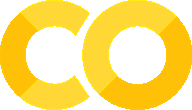&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-torchvision-datasets.ipynb)
[![Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=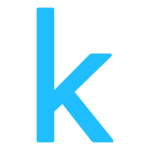&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-torchvision-datasets.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/analyzing-torchvision-datasets)

This notebook shows how you can analyze [Torchvision Datasets](https://pytorch.org/vision/main/datasets.html) for issues using fastdup.

## Installation

First, let's install the necessary packages.

In [ ]:
import sys
if "google.colab" in sys.modules:
    # Running in Google Colab
    !pip install --force-reinstall --no-cache-dir numpy==1.26.4 scipy fastdup torchvision
else:
    # Running outside Colab
    !pip install -Uq fastdup torchvision


Now, test the installation. If there's no error message, we are ready to go.

In [1]:
import fastdup
fastdup.__version__

'1.43'

## Download Dataset
Torchvision provides many built-in datasets in the `torchvision.datasets` module. The datasets span across various tasks such as image classification, object detection, and segmentation to name a few.

Let's download the [Caltech 256](https://data.caltech.edu/records/nyy15-4j048) dataset to our local directory.

Caltech 256 dataset consists of 256 object categories containing a total of 30607 images for image classification.

In [2]:
from torchvision.datasets import Caltech256
caltech256 = Caltech256(root='./', download=True)

Files already downloaded and verified


The datasets is downloaded into the `caltech256` folder in the root directory.

In [3]:
caltech256.root

'./caltech256'

## Construct Annotation DataFrame
Although you can run fasdup without the annotations, specifying the labels lets us do more analysis with fastdup such as inspecting mislabels.
Since the dataset is labeled, let's make use of the labels and feed them into fastdup.

fastdup expects the labels to be formatted into a Pandas `DataFrame` with the columns `filename` and `label`.
Let's loop over the directory recursively search for the filenames and labels, and format them into a DataFrame.

In [4]:
import glob
import os
import pandas as pd

# Define the path
path = "caltech256/"

# Define patterns for tif image found in the dataset
patterns = ['*jpg', '*jpeg']

# Use glob to get all image filenames for both extensions
filenames = [f for pattern in patterns for f in glob.glob(path + '**/' + pattern, recursive=True)]

# Extract the parent folder name for each filename
label = [os.path.basename(os.path.dirname(filename)) for filename in filenames]

# Convert to a pandas DataFrame and add the title label column
df = pd.DataFrame({
    'filename': filenames,
    'label': label
})

df

filename      label
0      caltech256/256_ObjectCategories/199.spoon/199_0092.jpg  199.spoon
1      caltech256/256_ObjectCategories/199.spoon/199_0006.jpg  199.spoon
2      caltech256/256_ObjectCategories/199.spoon/199_0063.jpg  199.spoon
3      caltech256/256_ObjectCategories/199.spoon/199_0073.jpg  199.spoon
4      caltech256/256_ObjectCategories/199.spoon/199_0021.jpg  199.spoon
...                                                       ...        ...
30602  caltech256/256_ObjectCategories/206.sushi/206_0074.jpg  206.sushi
30603  caltech256/256_ObjectCategories/206.sushi/206_0088.jpg  206.sushi
30604  caltech256/256_ObjectCategories/206.sushi/206_0043.jpg  206.sushi
30605  caltech256/256_ObjectCategories/206.sushi/206_0023.jpg  206.sushi
30606  caltech256/256_ObjectCategories/206.sushi/206_0025.jpg  206.sushi

[30607 rows x 2 columns]

## Run fastdup
One the dataset download completes, analyze the image folder where the dataset is stored.

Point `input_dir` to the directory where the images are stored.

In [5]:
fd = fastdup.create(input_dir="caltech256")
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.


                                                                               
   ad88                                          88                            
  d8"                             ,d             88                            
  88                              88             88                            
MM88MMM  ,adPPYYba,  ,adPPYba,  MM88MMM  ,adPPYb,88  88       88  8b,dPPYba,   
  88     ""     `Y8  I8[    ""    88    a8"    `Y88  88       88  88P'    "8a  
  88     ,adPPPPP88   `"Y8ba,     88    8b       88  88       88  88       d8  
  88     88,    ,88  aa    ]8I    88,   "8a,   ,d88  "8a,   ,a88  88b,   ,a8"  
  88     `"8bbdP"Y8  `"YbbdP"'    "Y888  `"8bbdP"Y8   `"YbbdP'Y8  88`YbbdP"'   
                                                                  88           
                                                                  88           


2023-09-26 14:16:12 [INFO] Going to loop 

0

## View Galleries

You can use all of fastdup gallery methods to view duplicates, clusters, etc.

```python
fd.vis.duplicates_gallery()    # create a visual gallery of duplicates
fd.vis.outliers_gallery()      # create a visual gallery of anomalies
fd.vis.component_gallery()     # create a visualization of connected components
fd.vis.stats_gallery()         # create a visualization of images statistics (e.g. blur)
fd.vis.similarity_gallery()    # create a gallery of similar images
```

Lets view some of the image clusters in the dataset.

049.cormorant


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 2.8
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



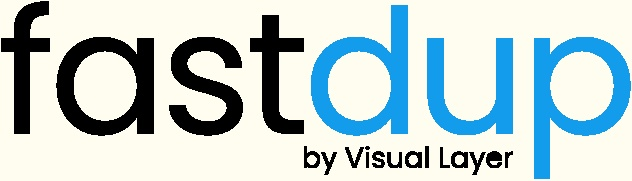
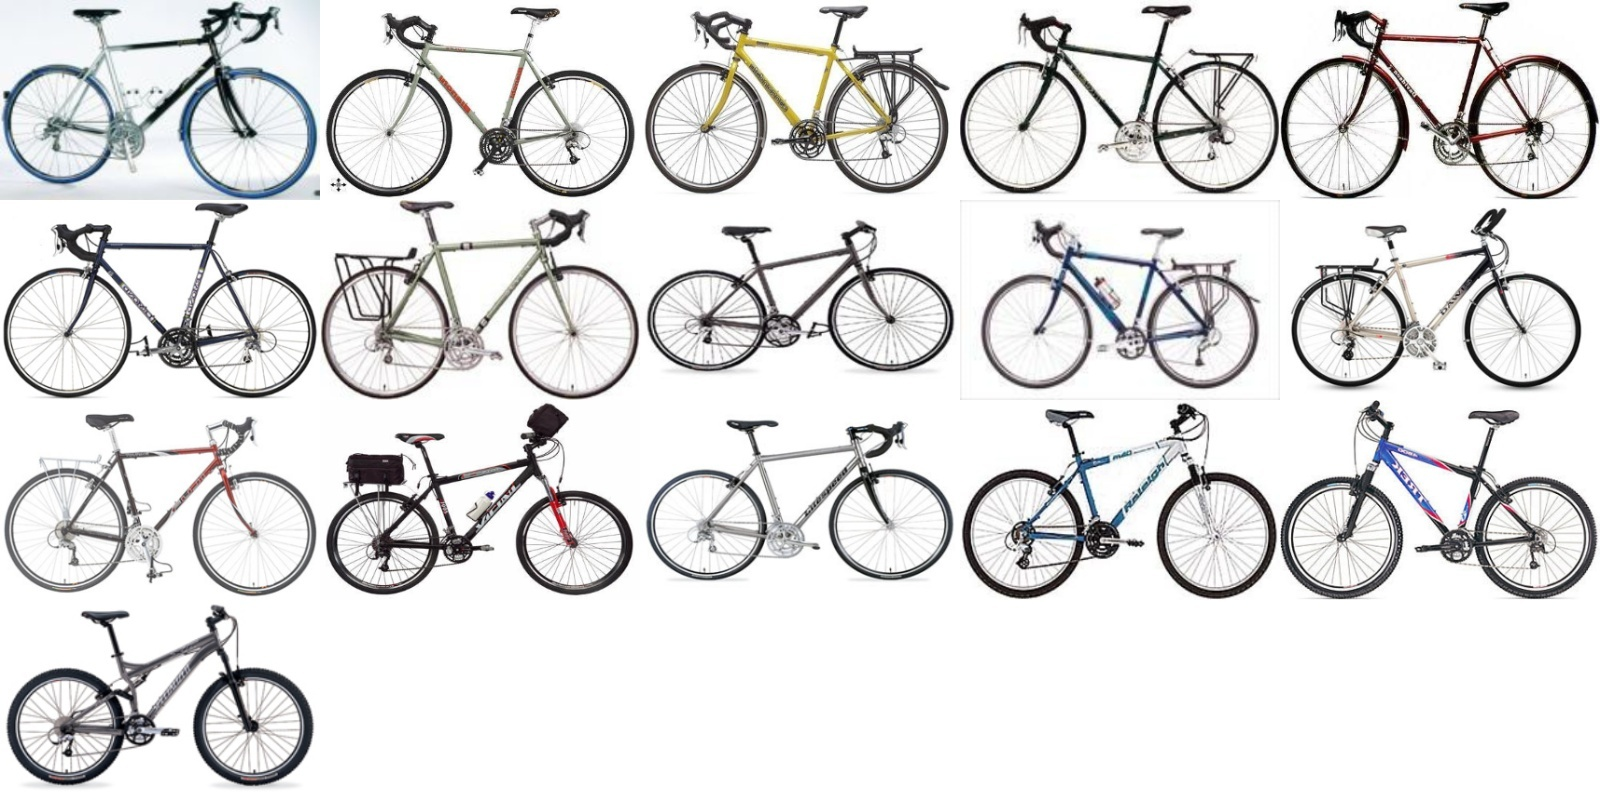
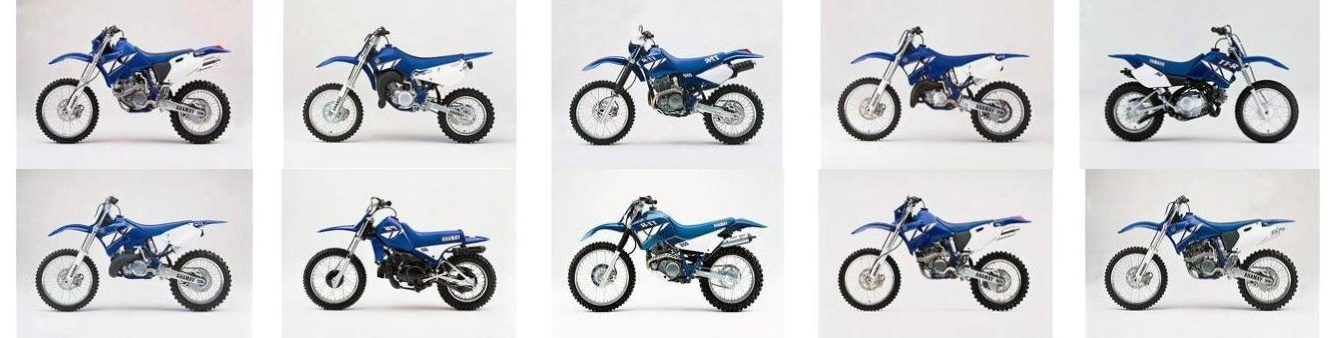
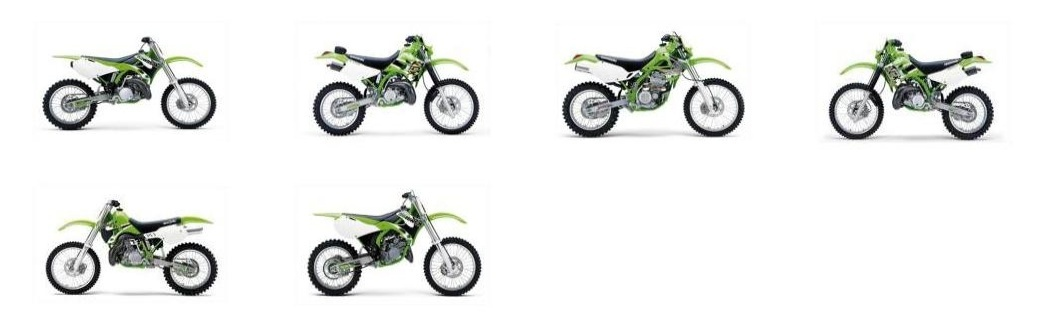
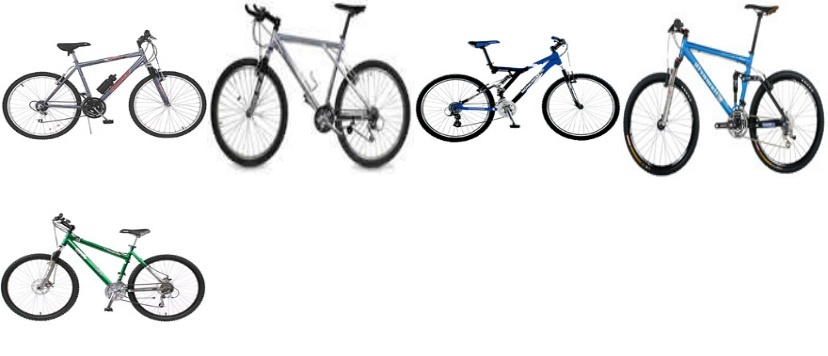
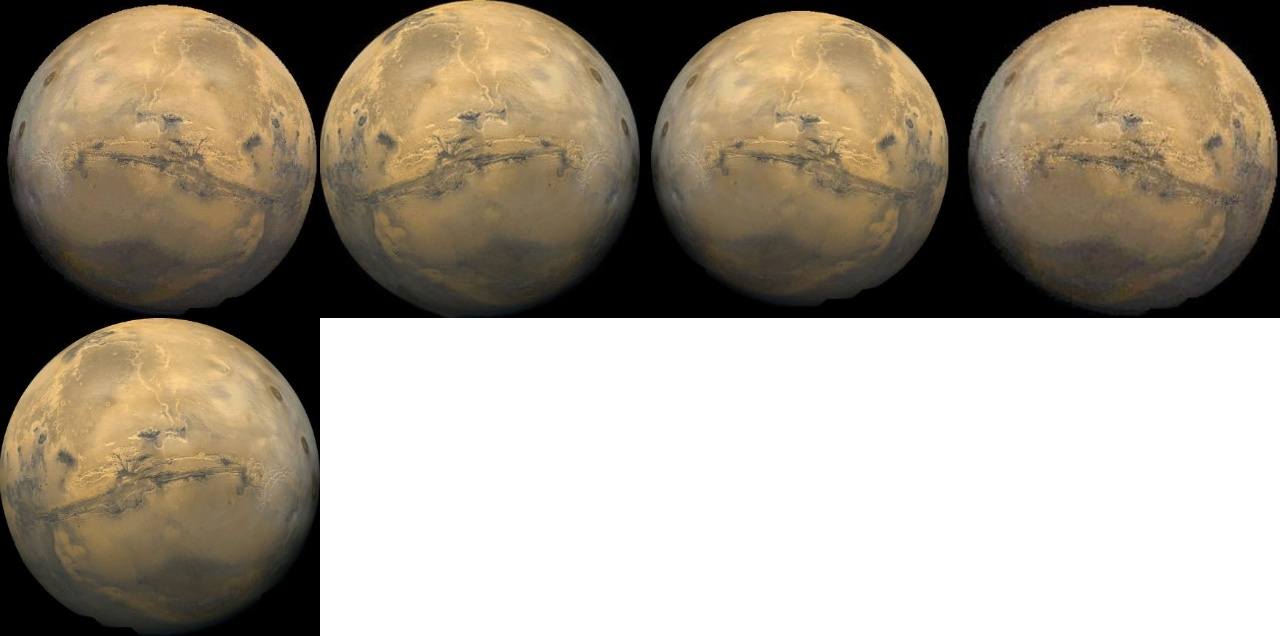
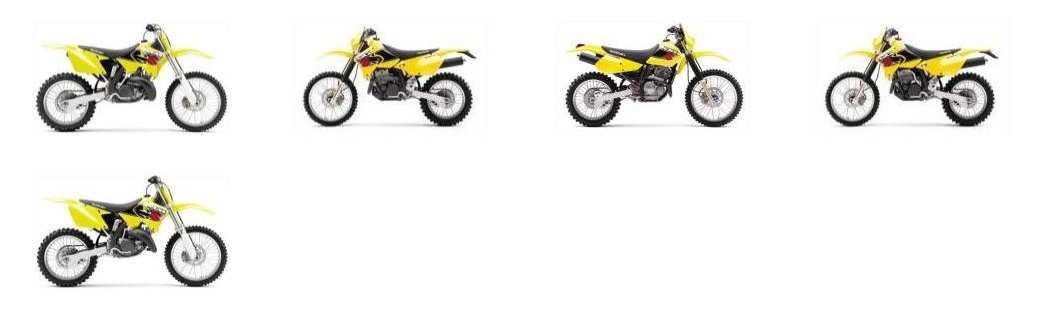
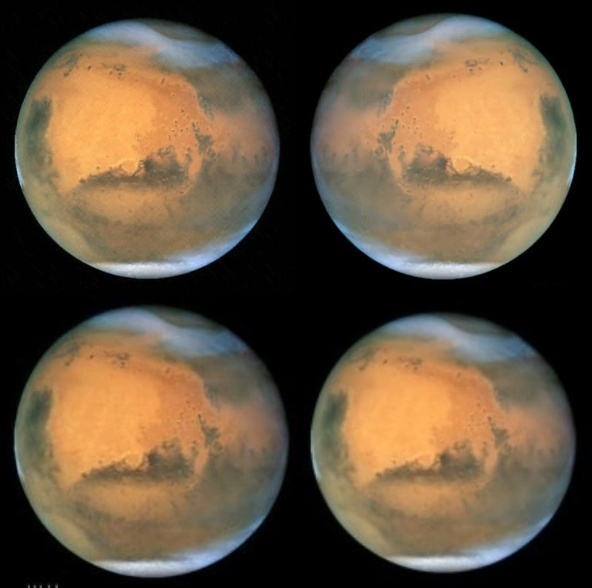
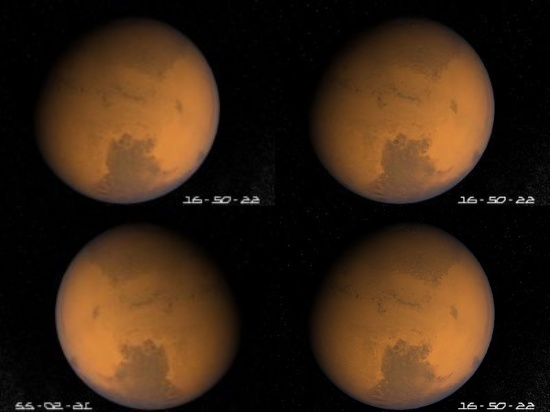
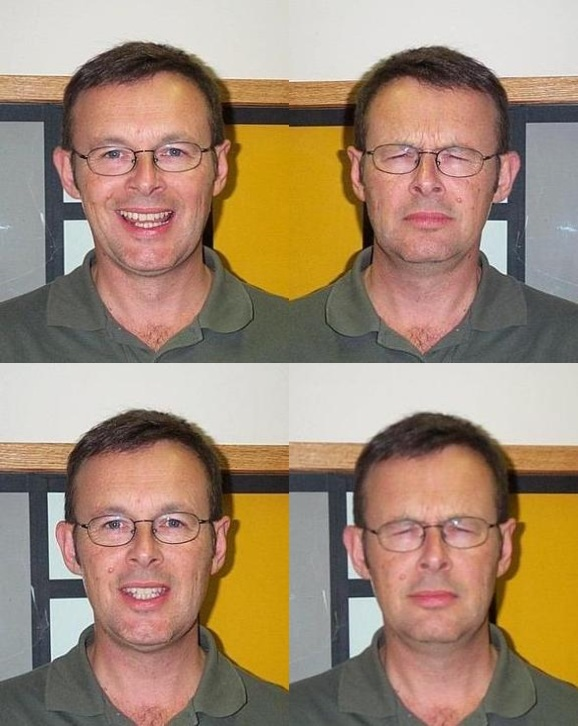
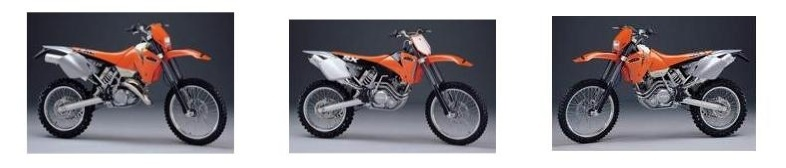
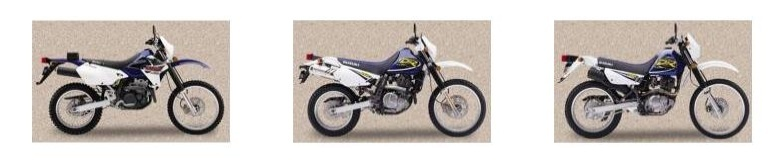
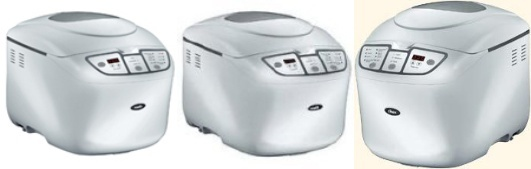
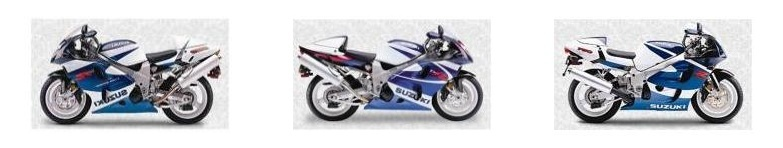
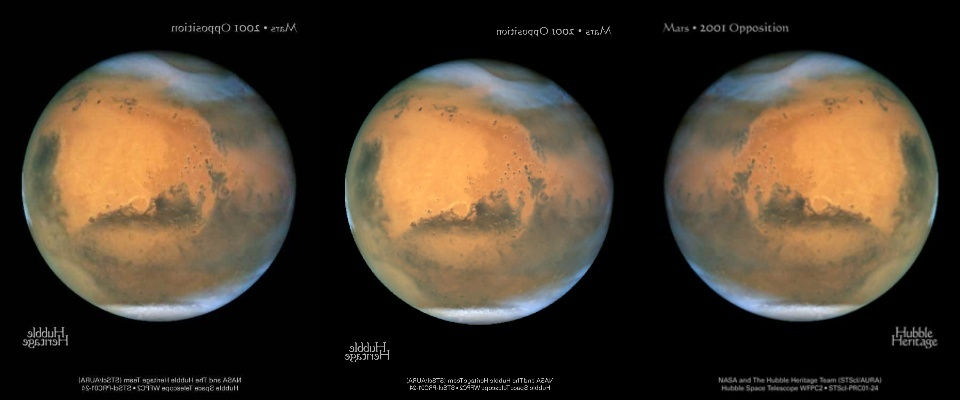
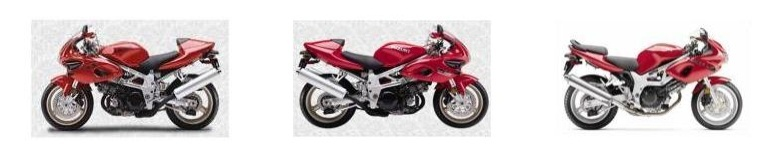
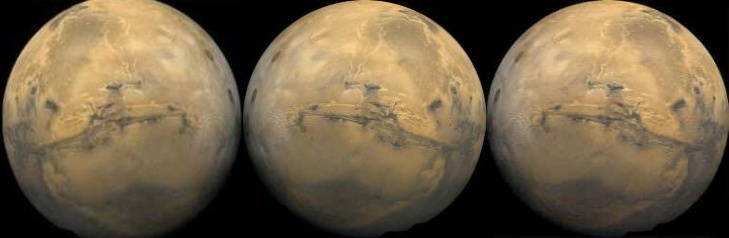
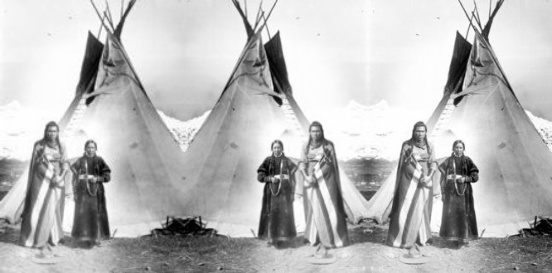
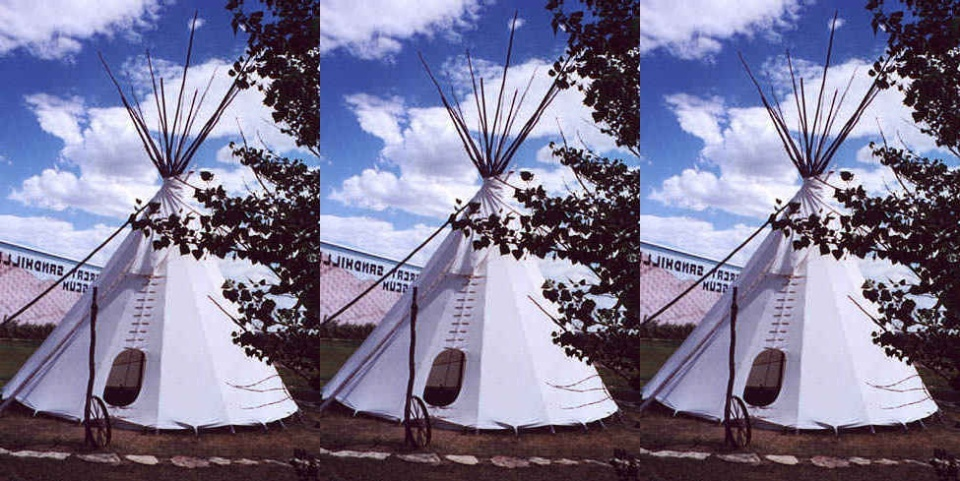
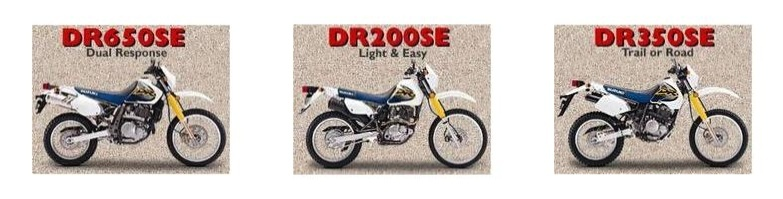
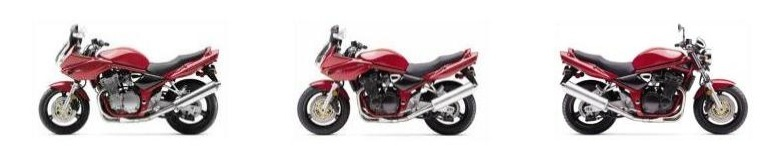

0

In [6]:
fd.vis.component_gallery()

And also inspect duplicates.

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



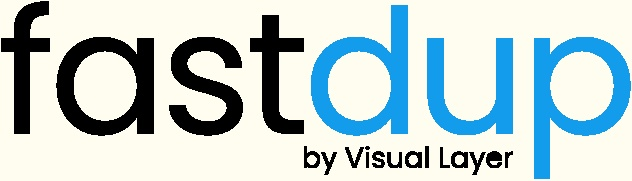
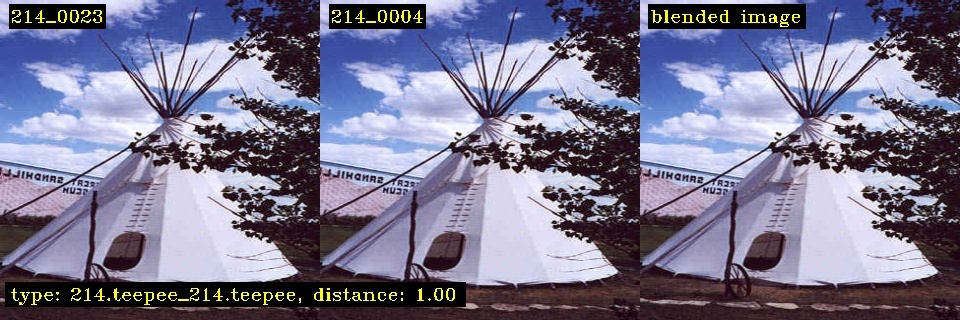
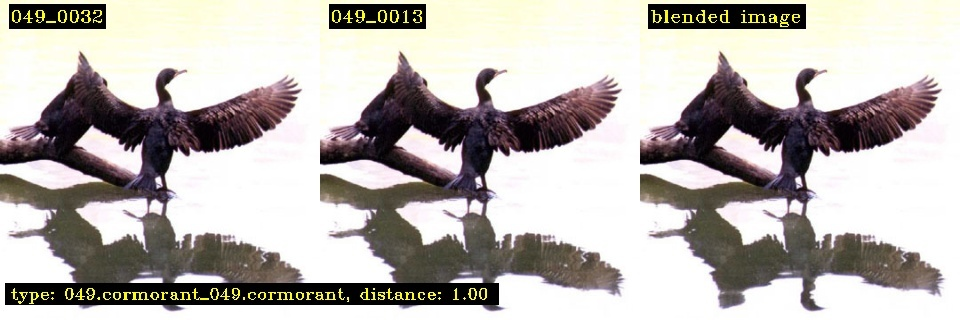
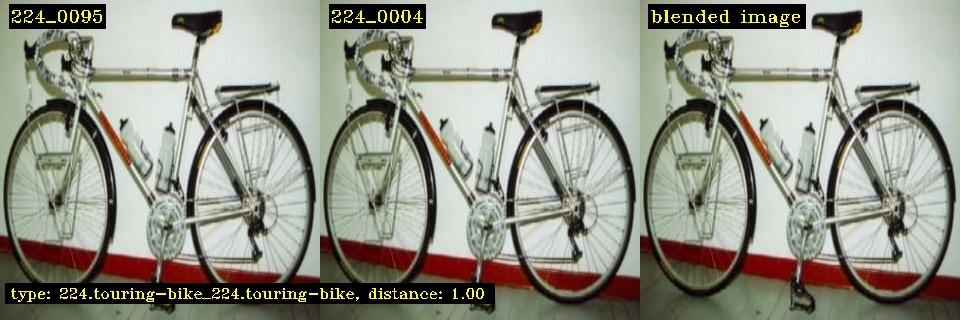
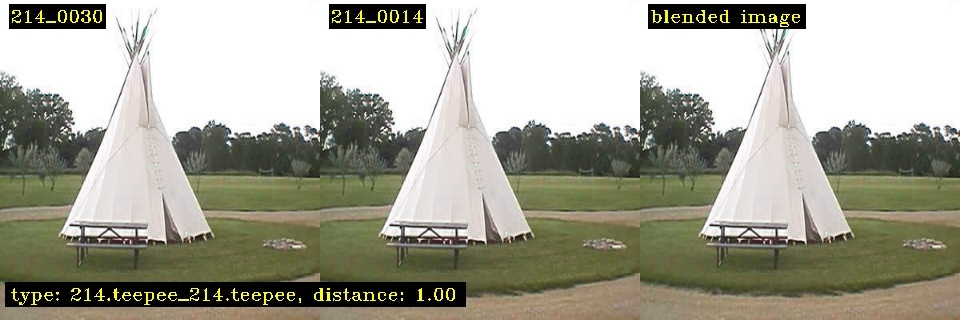
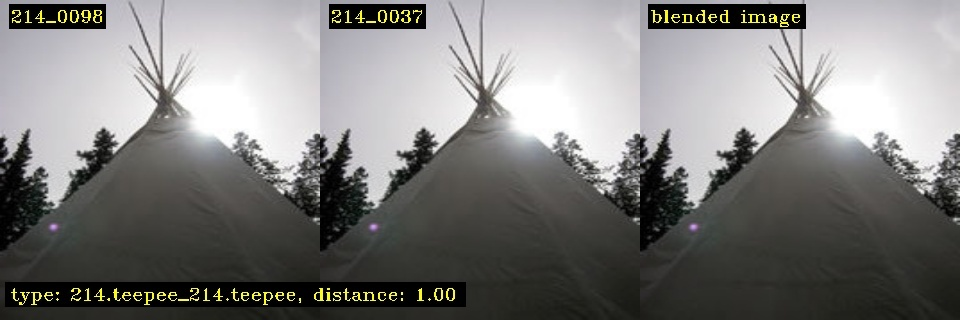
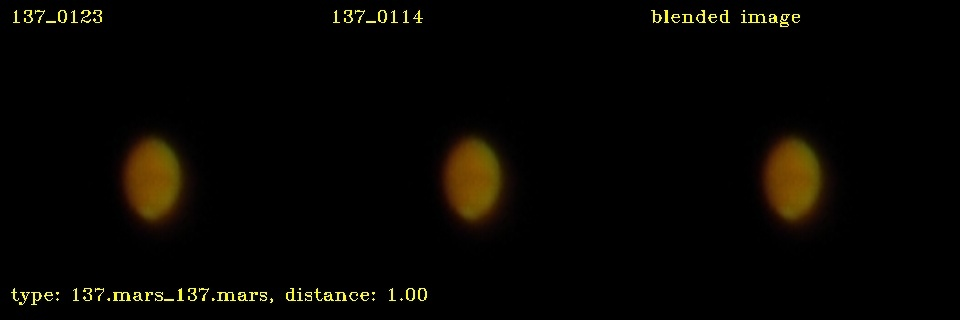
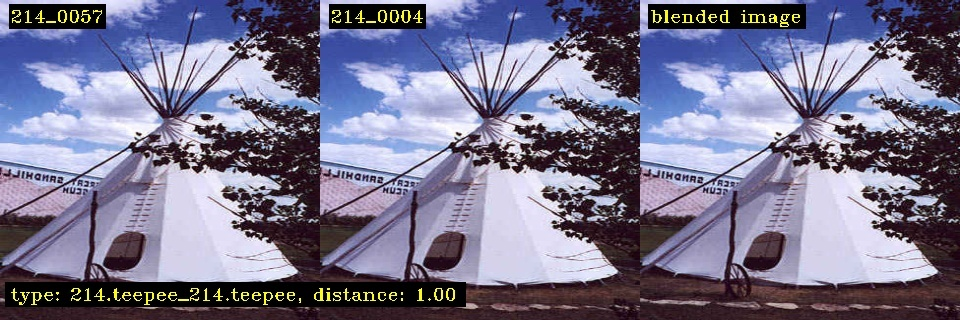
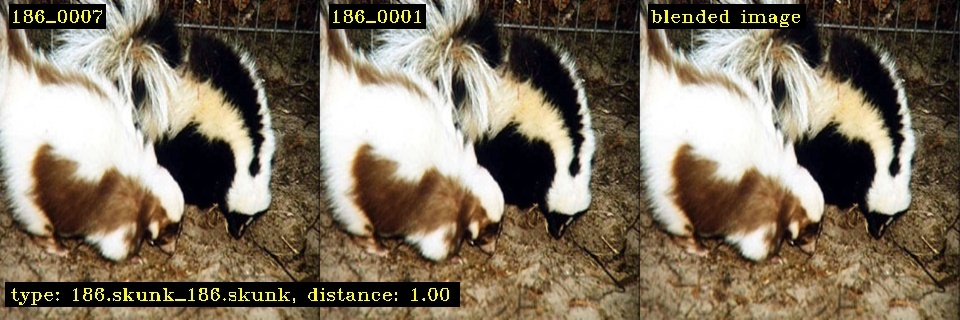
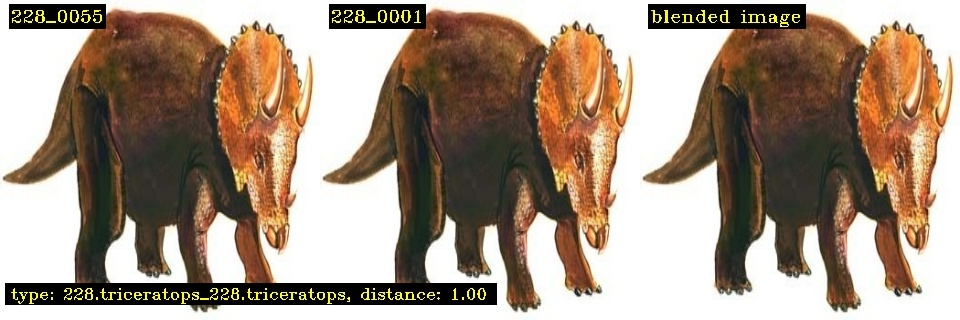
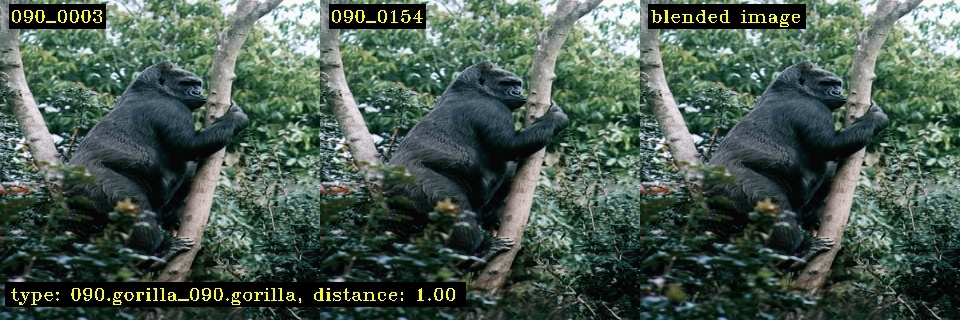
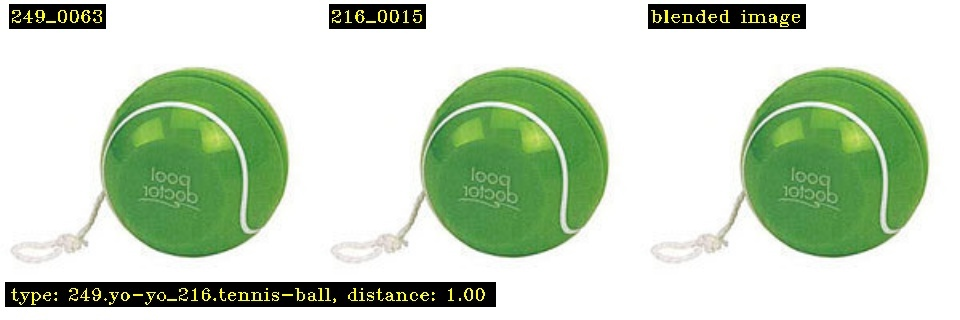
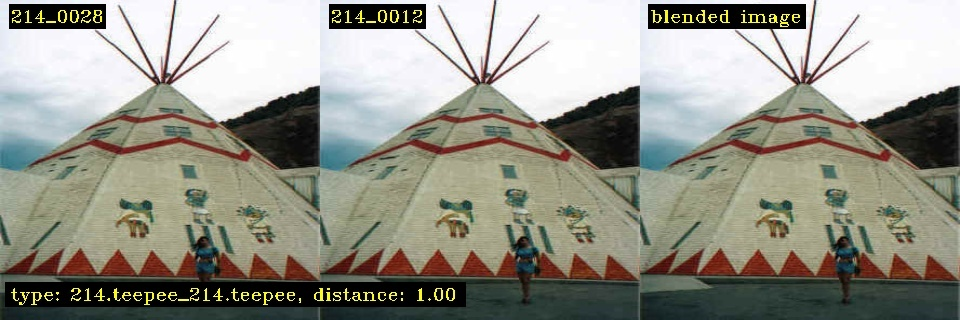
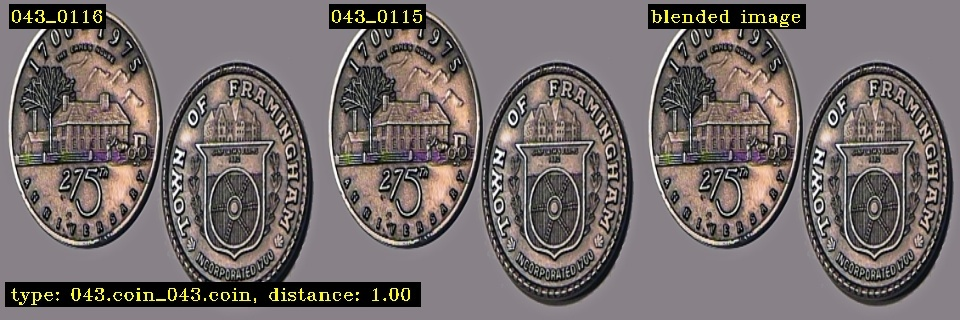

0

In [7]:
fd.vis.duplicates_gallery()

You can also see potential mislabels.

Generating gallery:   0%|          | 0/2912 [00:00<?, ?it/s]

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similar images visual view in  work_dir/galleries/similarity.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



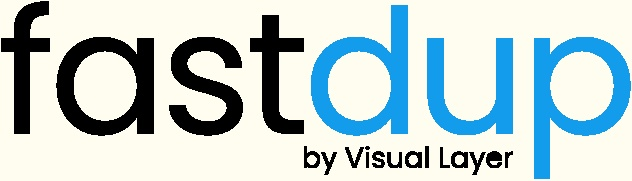
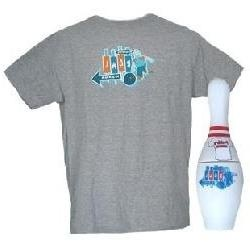
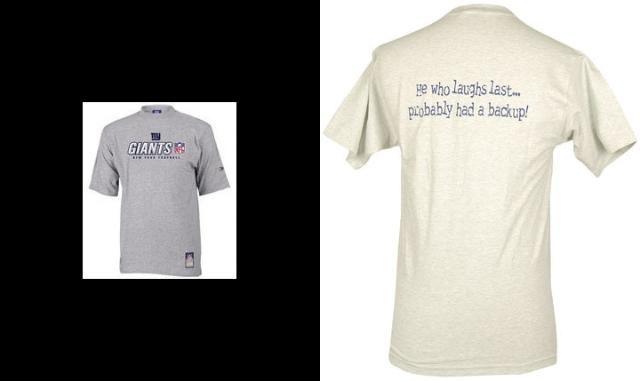
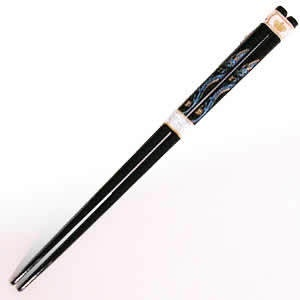
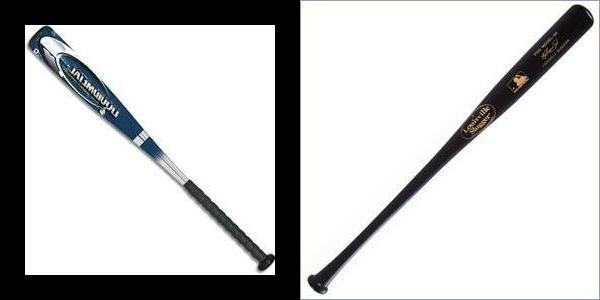
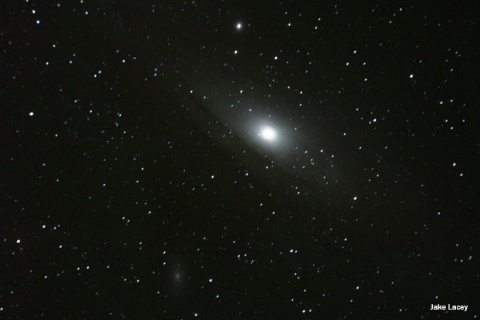
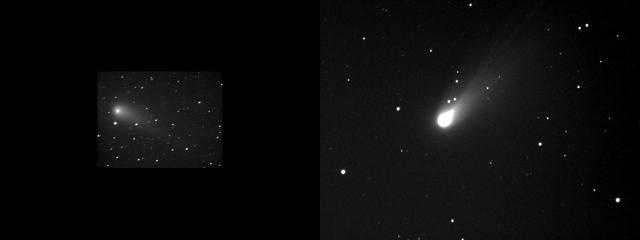
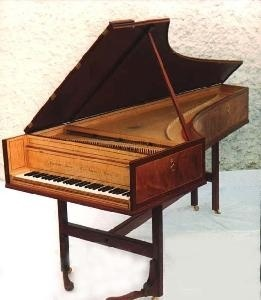
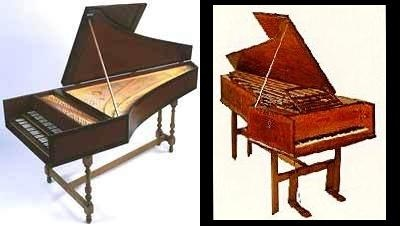
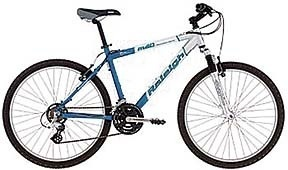
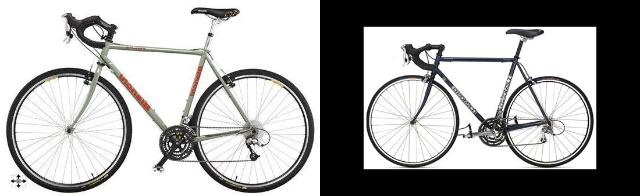
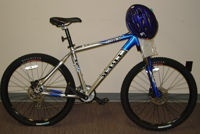
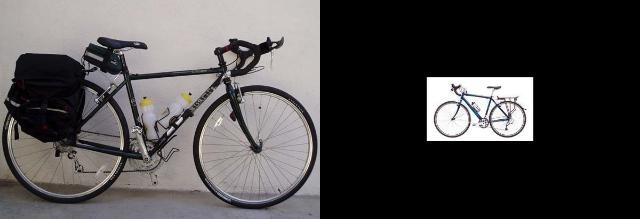
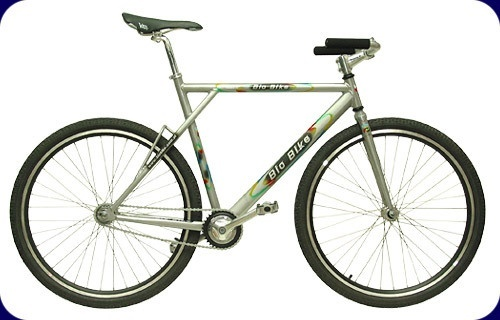
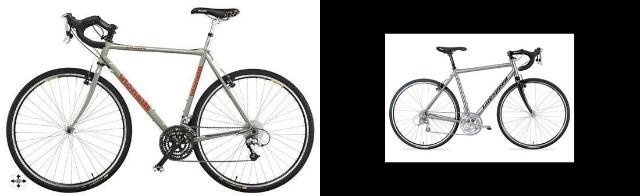
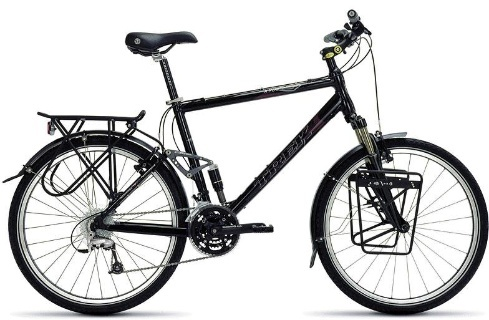
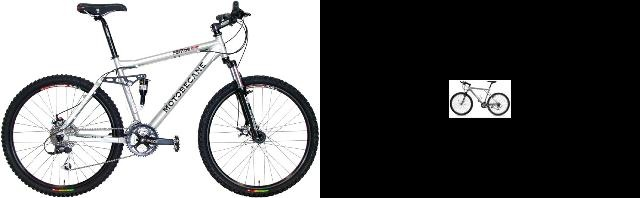
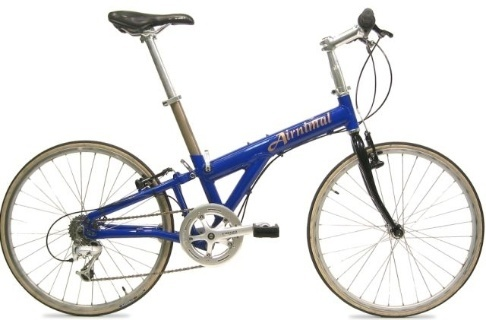
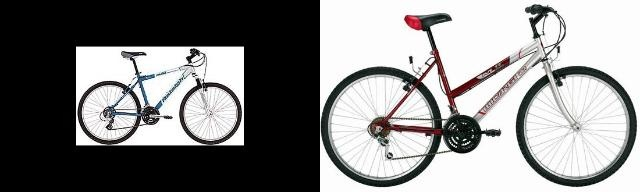
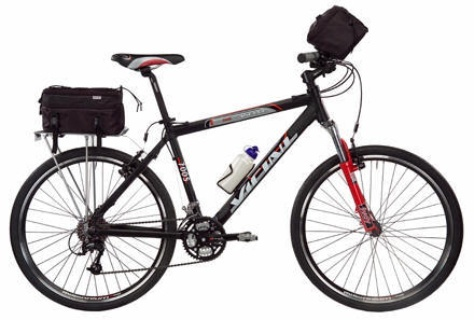
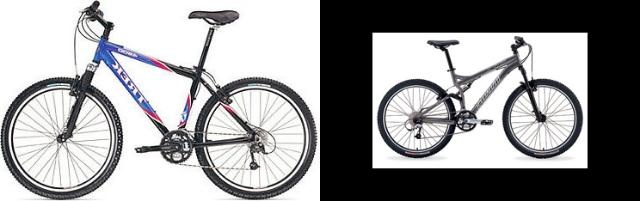
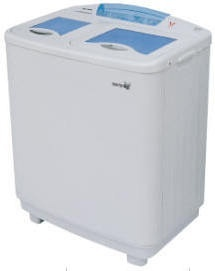
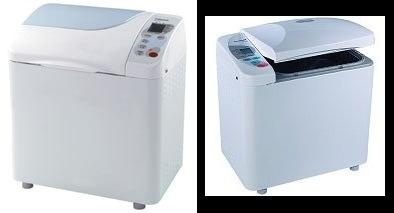
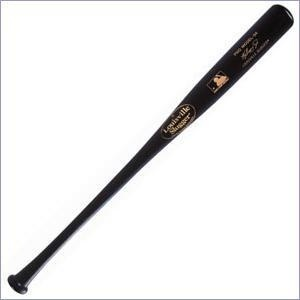
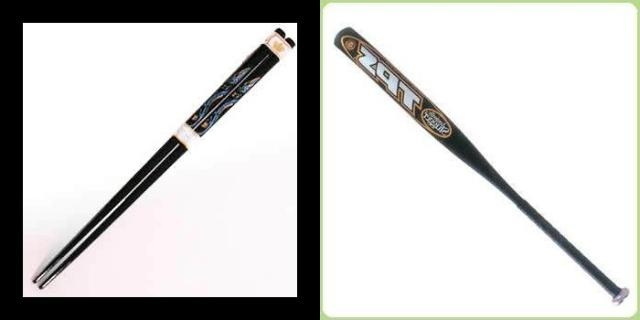
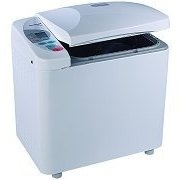
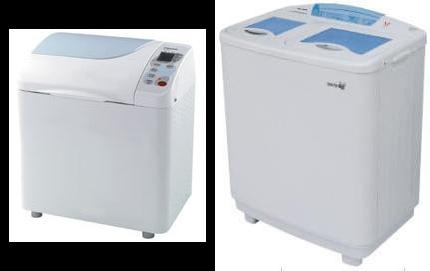
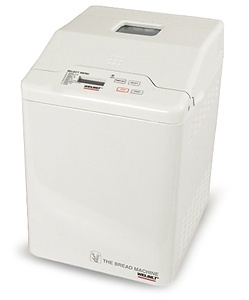
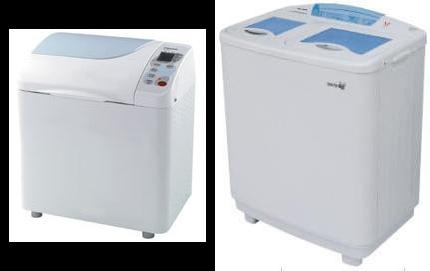
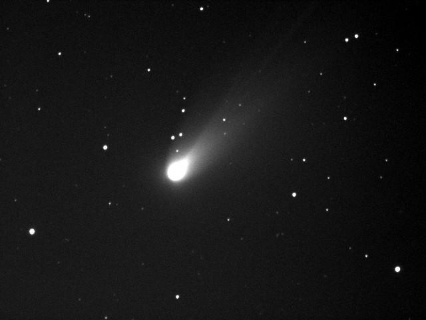
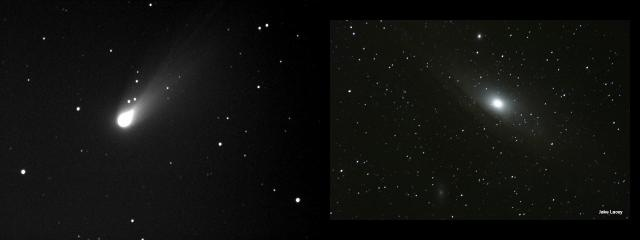
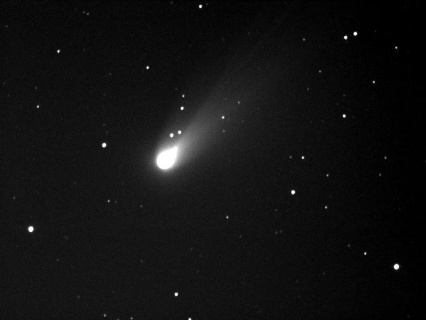
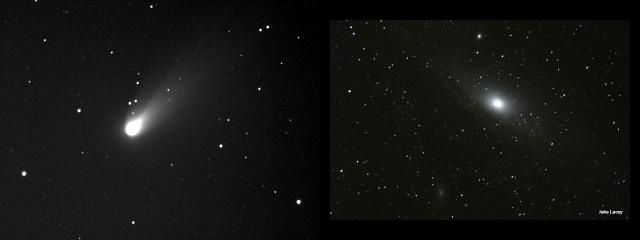
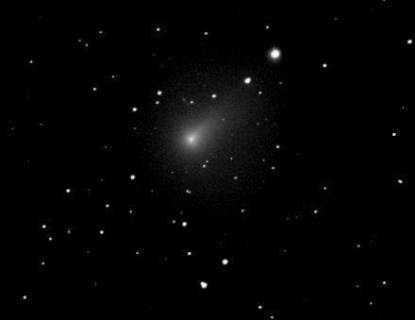
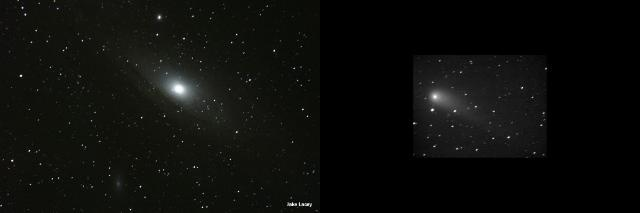
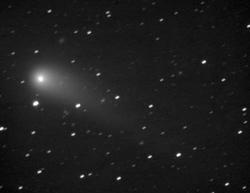
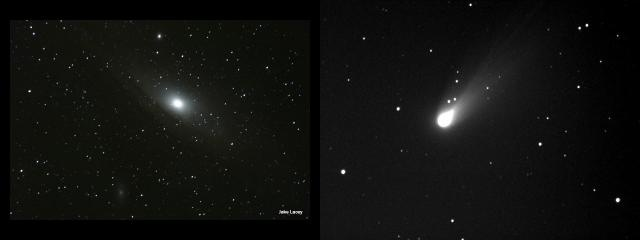
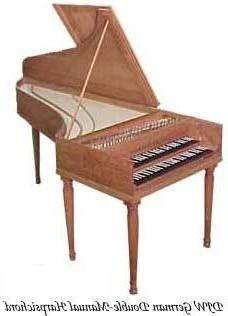
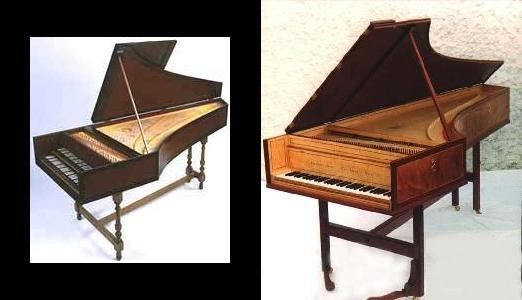
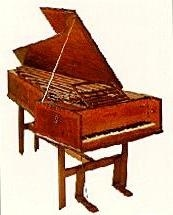
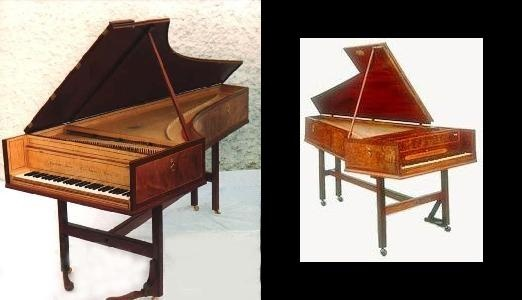

from                                                                                                                                  to                                       label                                    label2              distance  score  length
178       caltech256/256_ObjectCategories/018.bowling-pin/018_0017.jpg                [caltech256/256_ObjectCategories/232.t-shirt/232_0003.jpg, caltech256/256_ObjectCategories/232.t-shirt/232_0244.jpg]          [018.bowling-pin, 018.bowling-pin]                [232.t-shirt, 232.t-shirt]  [0.912907, 0.924003]    0.0       2
274        caltech256/256_ObjectCategories/039.chopsticks/039_0012.jpg      [caltech256/256_ObjectCategories/004.baseball-bat/004_0031.jpg, caltech256/256_ObjectCategories/004.baseball-bat/004_0111.jpg]            [039.chopsticks, 039.chopsticks]      [004.baseball-bat, 004.baseball-bat]   [0.90769, 0.913836]    0.0       2
511            caltech256/256_ObjectCategories/082.galaxy/082_0073.jpg                    [caltech256/256_ObjectCategories/044.comet/044_0013.jpg, caltech256/256_ObjectCategories/044.comet/044_0036.jpg]                    [082.galaxy, 082.galaxy]                    [044.comet, 044.comet]  [0.931574, 0.938969]    0.0       2
583   caltech256/256_ObjectCategories/091.grand-piano-101/091_0067.jpg        [caltech256/256_ObjectCategories/099.harpsichord/099_0070.jpg, caltech256/256_ObjectCategories/099.harpsichord/099_0080.jpg]  [091.grand-piano-101, 091.grand-piano-101]        [099.harpsichord, 099.harpsichord]  [0.910628, 0.915802]    0.0       2
1528    caltech256/256_ObjectCategories/146.mountain-bike/146_0041.jpg      [caltech256/256_ObjectCategories/224.touring-bike/224_0092.jpg, caltech256/256_ObjectCategories/224.touring-bike/224_0002.jpg]      [146.mountain-bike, 146.mountain-bike]      [224.touring-bike, 224.touring-bike]  [0.960591, 0.963142]    0.0       2
...                                                                ...                                                                                                                                 ...                                         ...                                       ...                   ...    ...     ...
2896   caltech256/256_ObjectCategories/253.faces-easy-101/253_0425.jpg  [caltech256/256_ObjectCategories/253.faces-easy-101/253_0420.jpg, caltech256/256_ObjectCategories/253.faces-easy-101/253_0429.jpg]    [253.faces-easy-101, 253.faces-easy-101]  [253.faces-easy-101, 253.faces-easy-101]  [0.901978, 0.910732]  100.0       2
2898   caltech256/256_ObjectCategories/253.faces-easy-101/253_0429.jpg  [caltech256/256_ObjectCategories/253.faces-easy-101/253_0420.jpg, caltech256/256_ObjectCategories/253.faces-easy-101/253_0425.jpg]    [253.faces-easy-101, 253.faces-easy-101]  [253.faces-easy-101, 253.faces-easy-101]   [0.90975, 0.910732]  100.0       2
2900   caltech256/256_ObjectCategories/253.faces-easy-101/253_0432.jpg  [caltech256/256_ObjectCategories/253.faces-easy-101/253_0423.jpg, caltech256/256_ObjectCategories/253.faces-easy-101/253_0434.jpg]    [253.faces-easy-101, 253.faces-easy-101]  [253.faces-easy-101, 253.faces-easy-101]  [0.907029, 0.915409]  100.0       2
2901   caltech256/256_ObjectCategories/253.faces-easy-101/253_0433.jpg  [caltech256/256_ObjectCategories/253.faces-easy-101/253_0428.jpg, caltech256/256_ObjectCategories/253.faces-easy-101/253_0430.jpg]    [253.faces-easy-101, 253.faces-easy-101]  [253.faces-easy-101, 253.faces-easy-101]  [0.914409, 0.920648]  100.0       2
2902   caltech256/256_ObjectCategories/253.faces-easy-101/253_0434.jpg  [caltech256/256_ObjectCategories/253.faces-easy-101/253_0432.jpg, caltech256/256_ObjectCategories/253.faces-easy-101/253_0423.jpg]    [253.faces-easy-101, 253.faces-easy-101]  [253.faces-easy-101, 253.faces-easy-101]  [0.915409, 0.928949]  100.0       2

[1568 rows x 7 columns]

In [8]:
fd.vis.similarity_gallery(slice='diff')

## Wrap Up
In this tutorial, we showed how you can analyze datasets from Torchvision Datasets using fastdup.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.


## VL Profiler - A faster and easier way to diagnose and visualize dataset issues

If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

VL Profiler is free to get started. Upload up to 1,000,000 images for analysis at zero cost!

[Sign up](https://app.visual-layer.com) now.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/github_banner_profiler.gif)](https://app.visual-layer.com)

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).

<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Slack Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>

<center> 
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" style="text-decoration: none;"> LinkedIn </a> •
    <a href="https://twitter.com/visual_layer" target="_blank" style="text-decoration: none;"> Twitter </a>
</center>